<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-8-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 8: Continuous probability distributions

In [1]:
library(tidyverse)

# set a simple black & white theme for our plots
theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Part 1: Rainfall in Burkina Faso 

In [2]:
set.seed(1)

In [3]:
many_worlds <- rnorm(1e5, 600, 50)
head(many_worlds)

[1] 568.6773 609.1822 558.2186 679.7640 616.4754 558.9766

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


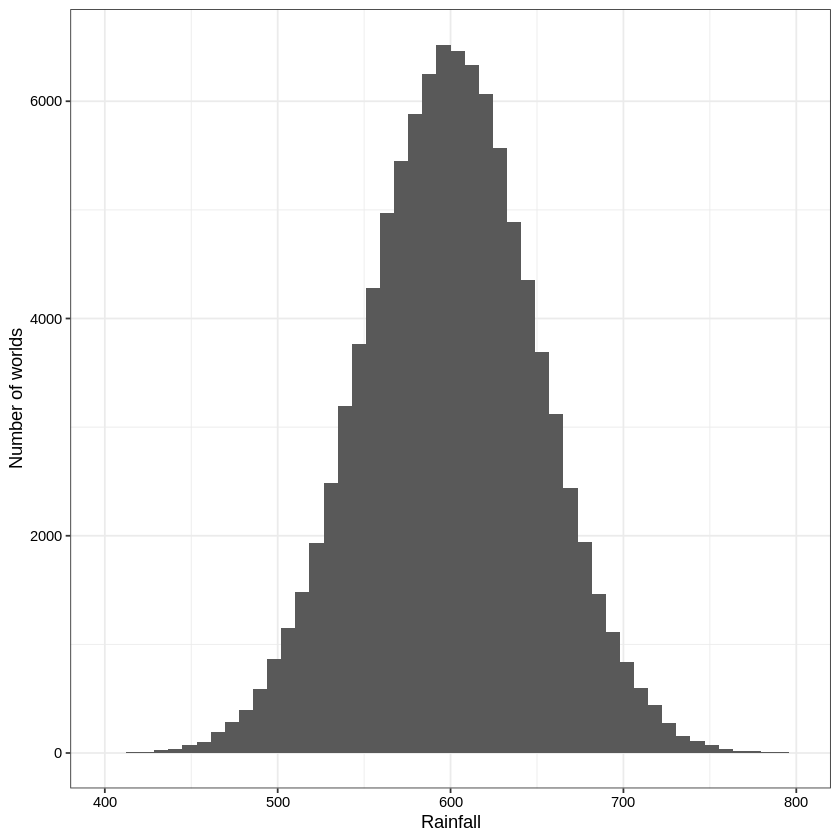

In [4]:
ggplot(tibble(Rainfall = many_worlds), aes(x = Rainfall)) + 
  geom_histogram(bins=50) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous(limits=c(400,800)) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('rainfall-100k.png', width=4, height=4)

In [5]:
head(many_worlds)

[1] 568.6773 609.1822 558.2186 679.7640 616.4754 558.9766

In [6]:
millet_succeeds <- many_worlds > 600
head(millet_succeeds)

[1] FALSE  TRUE FALSE  TRUE  TRUE FALSE

In [7]:
mean(millet_succeeds)

[1] 0.50026

In [8]:
cotton_succeeds <- (many_worlds >= 500) & (many_worlds <= 600)
head(cotton_succeeds)

[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE

In [9]:
mean(cotton_succeeds)

[1] 0.47633

##Part 2: Expectation of sums of random variables

age,avg
<fct>,<dbl>
Younger clients,9985.633
Older clients,19895.240


Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


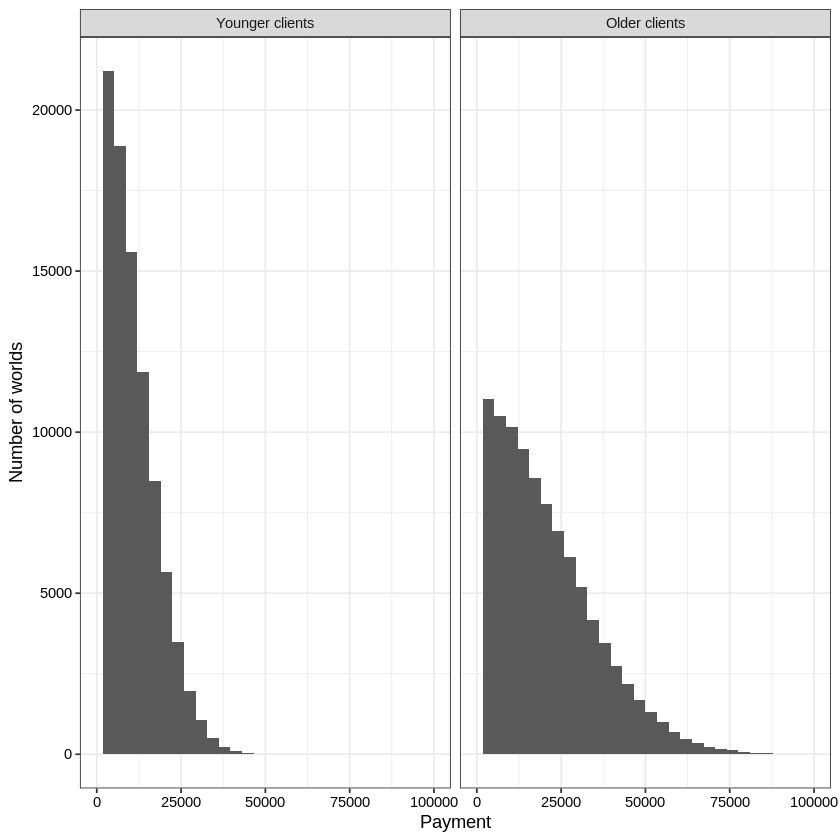

In [10]:
young <- abs(rnorm(1e5, 0, 12500))
old <- abs(rnorm(1e5, 0, 25000))

payments <- tibble(
  age = factor(
    c(rep('Younger clients', length(young)), 
      rep('Older clients', length(old))),
    levels = c("Younger clients", "Older clients")),
  payment = c(young, old)
)

payments %>% 
  group_by(age) %>%
  summarize(avg = mean(payment))

ggplot(payments, aes(x = payment)) + 
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous('Payment', limits=c(0, 1e5)) +
  facet_wrap(.~age) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))
  
ggsave('medical-payments.png', width=6, height=4)


Part 3: Variance

In [11]:
set.seed(1)

In [12]:
sum(rbernoulli(10, 0.5))

[1] 6

In [13]:
sum(rbernoulli(10, 0.5))

[1] 5

In [14]:
many_worlds <- replicate(1e5, sum(rbernoulli(10, 0.5)))

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


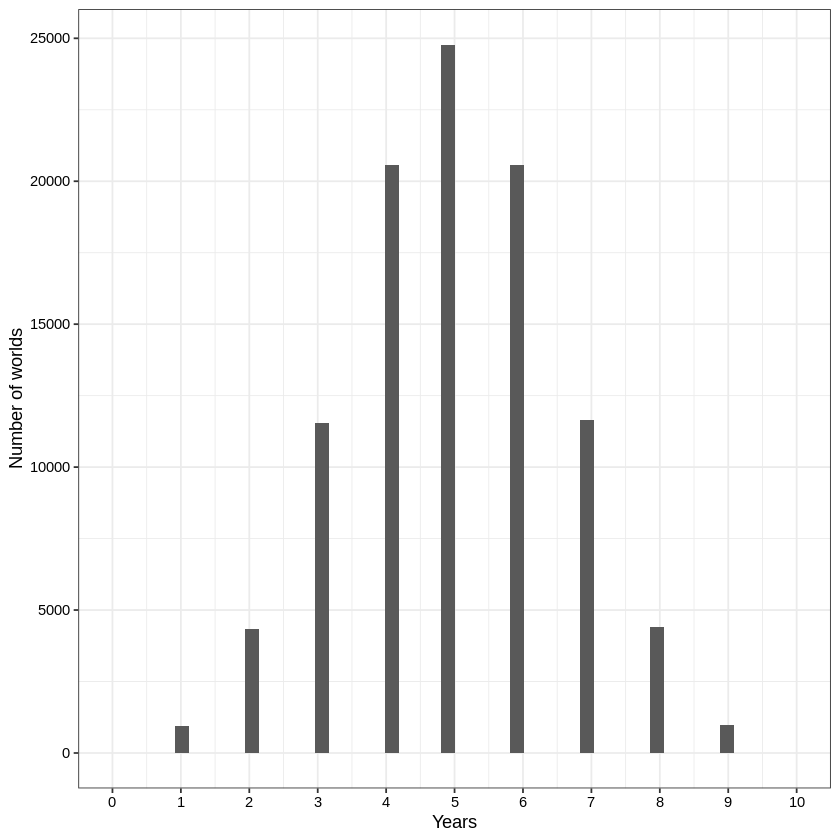

In [15]:
ggplot(tibble(Years = many_worlds), aes(x = Years)) + 
  geom_histogram(bins=50) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous(limits=c(0,10), breaks = 0:10) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('crop-yield.png', width=4, height=4)

In [16]:
mean(many_worlds)

[1] 5.00368

In [17]:
sd(many_worlds)

[1] 1.576271